<a href="https://colab.research.google.com/github/Hutch03/Portafolio/blob/main/python-ciencia-datos/random-forest/optimziacion_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicción de retrasos en vuelos





##🧾1.Librearias a utilziar

In [391]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


##📊2.Datos a analizar

###2.1.Carga de datos

In [392]:
df=pd.read_csv('flights.csv')

###2.2.Revisión de conjunto de datos

In [393]:
#Primeras 5 filas
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [394]:
#Tamaño de datos
df.shape

(71175, 11)

In [395]:
#Información de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [396]:
#Descripción de datos cuantitativos
df.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [397]:
#Descripción de datos cualitativos
df.describe(include=('object','boolean'))

,airline,aircraft_type,schengen,origin,is_holiday
count,71175,71175,71175,71175,71175
unique,3,6,2,10,2
top,BZ,Airbus A320,schengen,TZF,False
freq,47598,30778,42569,14162,67275


In [398]:
#Valores únicos de datos cualitativos
for col in df.select_dtypes(include=['object', 'bool']).columns:
    print(f"\nValores únicos en la columna '{col}':")
    print(df[col].value_counts())



Valores únicos en la columna 'airline':
airline
BZ    47598
YE    14137
MM     9440
Name: count, dtype: int64

Valores únicos en la columna 'aircraft_type':
aircraft_type
Airbus A320     30778
Airbus A330     16654
Boeing 787       9606
Embraer E175     7098
Boeing 737       4722
Boeing 777       2317
Name: count, dtype: int64

Valores únicos en la columna 'schengen':
schengen
schengen        42569
non-schengen    28606
Name: count, dtype: int64

Valores únicos en la columna 'origin':
origin
TZF    14162
TCY    11899
ZQO    11743
FJB     7206
CNU     4841
EMM     4778
MWL     4776
AUZ     4717
CSF     4674
PUA     2379
Name: count, dtype: int64

Valores únicos en la columna 'is_holiday':
is_holiday
False    67275
True      3900
Name: count, dtype: int64


###2.3.Revisión Gráfica de datos

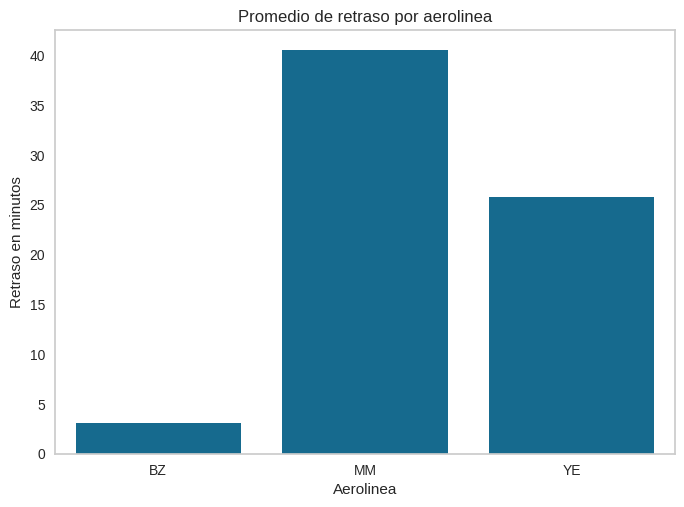

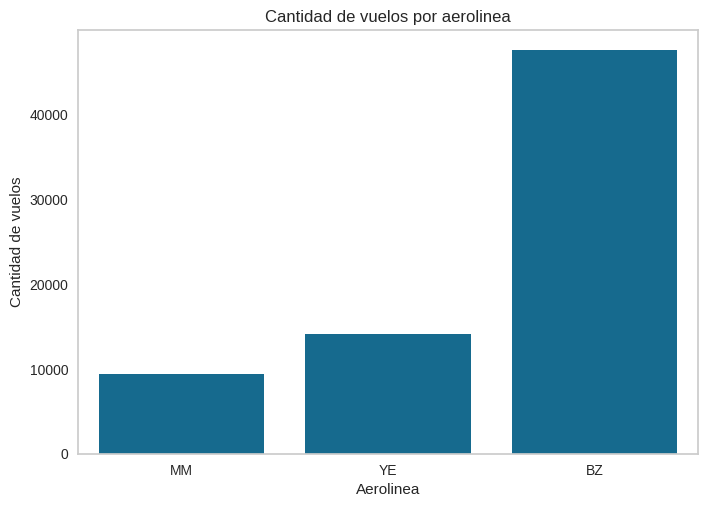

In [399]:
#Promedio de retraso por aerolinea
avg_delay=df.groupby('airline')['delay'].mean().reset_index()
#Gráfico de retraso
sns.barplot(x='airline',y='delay',data=avg_delay)
plt.title('Promedio de retraso por aerolinea')
plt.xlabel('Aerolinea')
plt.ylabel('Retraso en minutos')
plt.grid(False)
plt.show()
#Gráfica de cantidad de vuelos
sns.countplot(x='airline',data=df)
plt.title('Cantidad de vuelos por aerolinea')
plt.xlabel('Aerolinea')
plt.ylabel('Cantidad de vuelos')
plt.grid(False)
plt.show()

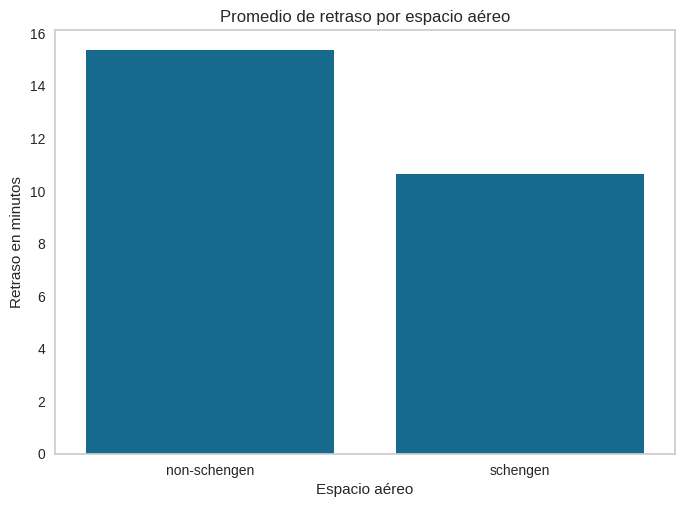

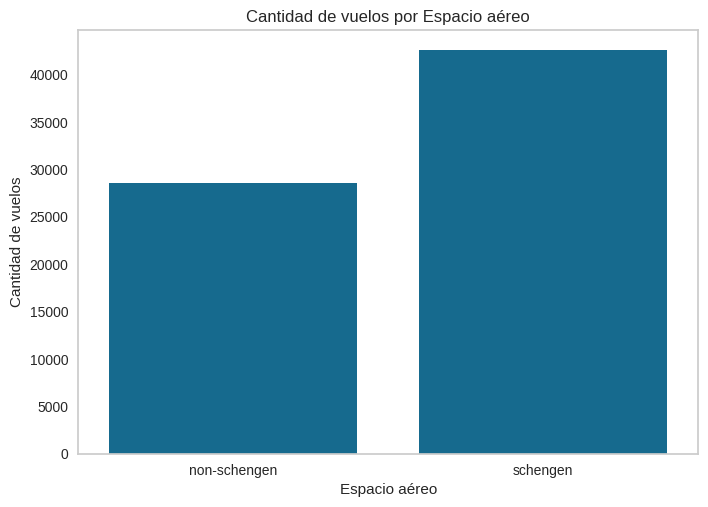

In [400]:
#Promedio de retraso por espacio
avg_delay=df.groupby('schengen')['delay'].mean().reset_index()
#Gráfico de retraso
sns.barplot(x='schengen',y='delay',data=avg_delay)
plt.title('Promedio de retraso por espacio aéreo')
plt.xlabel('Espacio aéreo')
plt.ylabel('Retraso en minutos')
plt.grid(False)
plt.show()
#Gráfica de cantidad de vuelos
sns.countplot(x='schengen',data=df)
plt.title('Cantidad de vuelos por Espacio aéreo')
plt.xlabel('Espacio aéreo')
plt.ylabel('Cantidad de vuelos')
plt.grid(False)
plt.show()

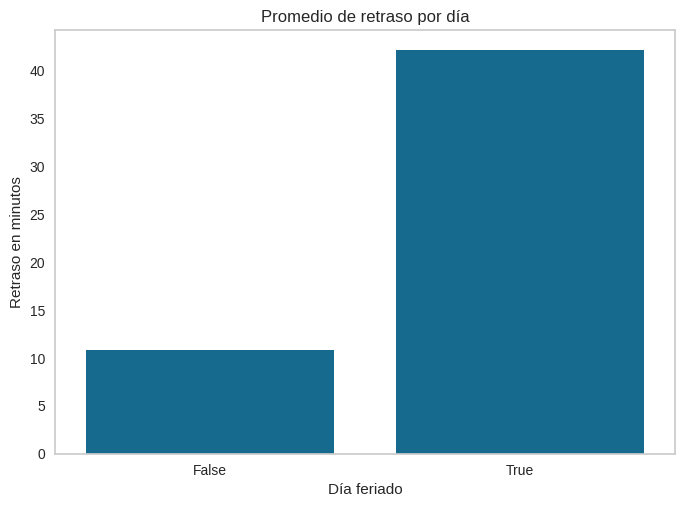

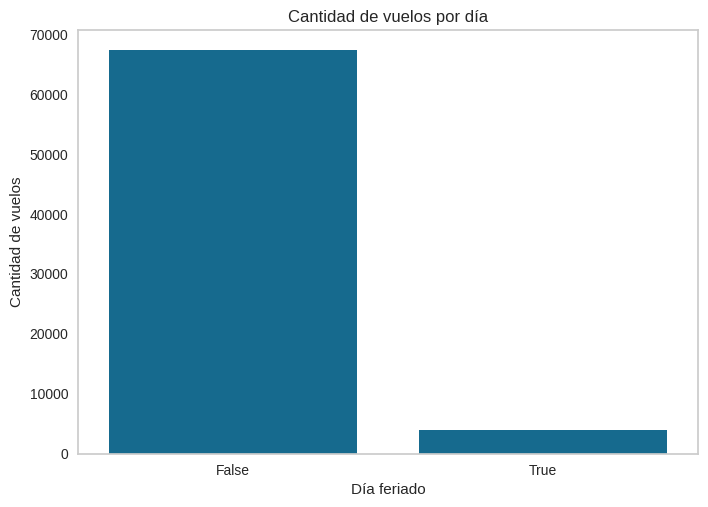

In [401]:
#Promedio de retraso por día
avg_delay=df.groupby('is_holiday')['delay'].mean().reset_index()
#Gráfico de retraso
sns.barplot(x='is_holiday',y='delay',data=avg_delay)
plt.title('Promedio de retraso por día')
plt.xlabel('Día feriado')
plt.ylabel('Retraso en minutos')
plt.grid(False)
plt.show()
#Gráfica de cantidad de vuelos
sns.countplot(x='is_holiday',data=df)
plt.title('Cantidad de vuelos por día')
plt.xlabel('Día feriado')
plt.ylabel('Cantidad de vuelos')
plt.grid(False)
plt.show()

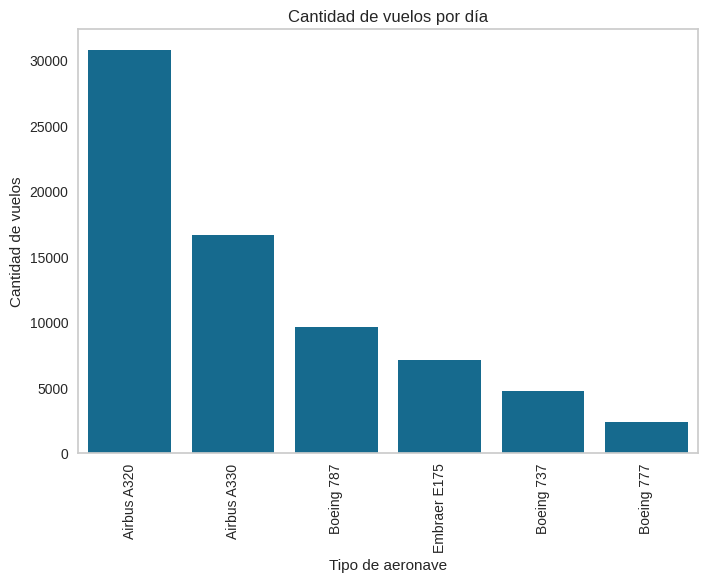

In [402]:
#Gráfica de cantidad de vuelos por aero naves
orden_aeronaves=df['aircraft_type'].value_counts().index

sns.countplot(x='aircraft_type',order=orden_aeronaves,data=df)
plt.title('Cantidad de vuelos por día')
plt.xticks(rotation=90)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Cantidad de vuelos')
plt.grid(False)
plt.show()

###2.4.Distribución de variables cualitativas

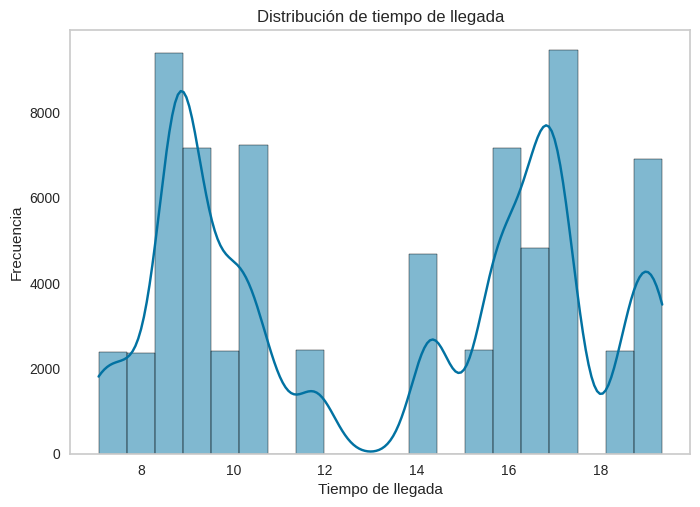

In [403]:
#Tiempo de arrivo
sns.histplot(x='arrival_time',data=df,bins=20,kde=True)
plt.title('Distribución de tiempo de llegada')
plt.xlabel('Tiempo de llegada')
plt.ylabel('Frecuencia')
plt.grid(False)

In [404]:
#Aplicación de Freedman-Diacons para cálculo del rango de frecuencia
def ancho_bin(df,columna):
 q75,q25=np.percentile(df[columna],[75,25])
 iqr=q75-q25
 ancho=2*iqr/(len(df[columna])**(1/3))
 return ancho

In [405]:
ancho_bin(df,'arrival_time')

np.float64(0.3846176245547029)

Text(0, 0.5, 'Frecuencia')

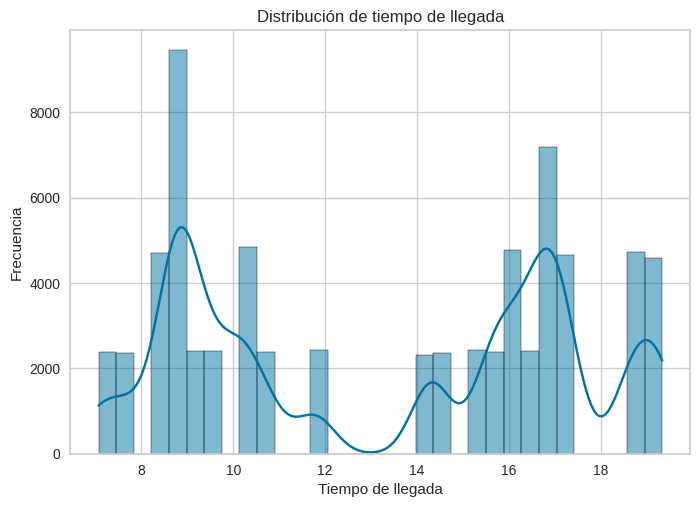

In [406]:
#Histograma de tiempo de llegada con rangos calculados
sns.histplot(x='arrival_time',data=df,binwidth=ancho_bin(df,'arrival_time'),kde=True)
plt.title('Distribución de tiempo de llegada')
plt.xlabel('Tiempo de llegada')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

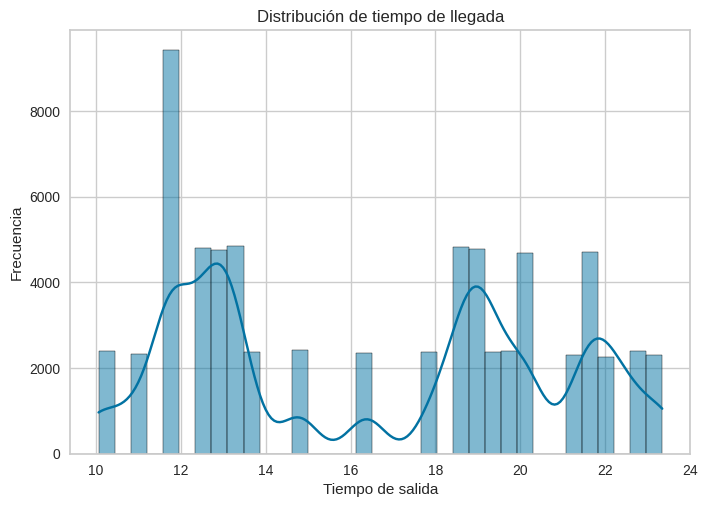

In [407]:
#Distribución para el horario de salida
ancho_bin(df,'departure_time')
sns.histplot(x='departure_time',data=df,binwidth=ancho_bin(df,'arrival_time'),kde=True)
plt.title('Distribución de tiempo de llegada')
plt.xlabel('Tiempo de salida')
plt.ylabel('Frecuencia')

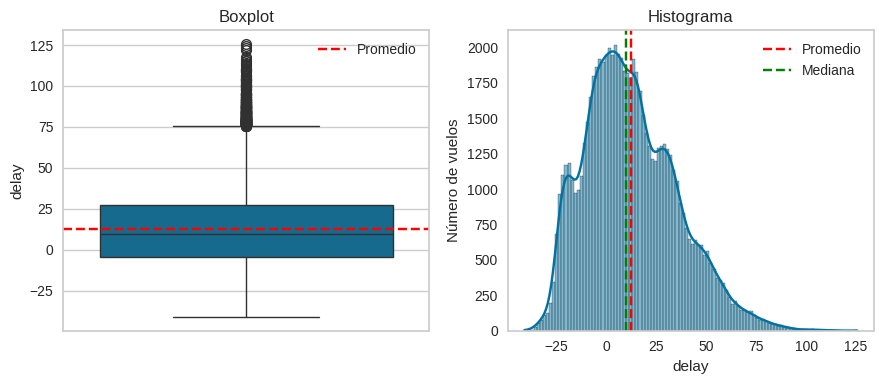

In [408]:
#Distribución de retraso promedio
atraso_promedio=df['delay'].mean()
atraso_mediana=df['delay'].median()
#Gráfico de cajas y bigotes de tiempo de retraso
fig,ax=plt.subplots(1,2,figsize=(9,4))
sns.boxplot(data=df,y='delay',ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio,color='red',linestyle='dashed',label='Promedio')
ax[0].legend()
#Histograma de tiempo de retraso
sns.histplot(data=df,x='delay',ax=ax[1],kde=True,binwidth=ancho_bin(df,'delay'))
plt.ylabel('Número de vuelos')
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio,color='red',linestyle='dashed',label='Promedio')
ax[1].axvline(x=atraso_mediana,color='green',linestyle='dashed',label='Mediana')
ax[1].legend()
plt.grid(False)
plt.tight_layout()


##🛠️3.Nuevos atributos

In [409]:
#Creación de columna de fecha de vuelo
df['date']=df['year'].astype(str)+'-'+(df['day']+1).astype(str)
df['date']=pd.to_datetime(df['date'],format='%Y-%j')
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [410]:
#Creación de columna para validar si es fin de semana
df['is_weekend']=df['date'].dt.weekday.isin([5,6])
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False


In [411]:
#Columna para agregar nombre del día
df['day_name']=df['date'].dt.day_name()
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


In [412]:
#Información de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

##🖥️4.One hot encoding

In [413]:
#Transformaciónde columnas booleanas a númericas
df['schengen']=df['schengen'].replace({'non-schengen':0,'schengen':1})
df['is_holiday']=df['is_holiday'].replace({False:0,True:1})
df['is_weekend']=df['is_weekend'].replace({False:0,True:1})
df.sample(3)

/tmp/ipython-input-413-1911708367.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['schengen']=df['schengen'].replace({'non-schengen':0,'schengen':1})
/tmp/ipython-input-413-1911708367.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_holiday']=df['is_holiday'].replace({False:0,True:1})
/tmp/ipython-input-413-1911708367.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
71081,22,YE,Airbus A320,0,MWL,8.794147,11.794147,358,2022,0,41.262563,2022-12-25,1,Sunday
66004,13,BZ,Boeing 787,0,TCY,10.172731,13.172731,20,2022,0,-5.438410,2022-01-21,0,Friday
40814,17,BZ,Airbus A330,0,CNU,16.718722,21.718722,165,2017,0,-3.977157,2017-06-15,0,Thursday


In [414]:
#Transformación de variables categóricas
categoricas=['airline','aircraft_type','origin','day_name']
df=pd.get_dummies(df,columns=categoricas,dtype=int)
df.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


##⚙️5.Preparación de variables

In [415]:
#Revisión de correlación de tiempos de llegada a salida
df[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [416]:
#Eliminación de variables no codificadas y de correlación entre variables
df.drop(['flight_id','departure_time','day','date','year'],axis=1,inplace=True)
df.sample(3)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
46346,1,9.668655,0,19.749011,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
52139,0,19.341235,0,21.353819,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60560,1,17.313731,0,1.422918,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0


##🧑‍💻6.Definición del modelo

###6.1.Modelo base de comparación

In [417]:
#Importar función de modelo dummy de sklearn y división de datos
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [418]:
#Selección de variables dependientes e independientes
X=df.drop('delay',axis=1)
y=df['delay']

In [419]:
#Segregación de modelo
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [420]:
#Modelo base
baseline=DummyRegressor()
baseline.fit(X_train,y_train)


DummyRegressor()

In [421]:
#Estadisticas de modelo base
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=baseline.predict(X_test)

def calcular_regresion(y_test,y_pred):
    mae=mean_absolute_error(y_test,y_pred)
    rmse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    metricas={'mae':round(mae,4),'rmse':round((rmse**(1/2)),4),'r2':round(r2,4)}
    return metricas
resultados=calcular_regresion(y_test,y_pred)
resultados

{'mae': 18.5646, 'rmse': 23.1612, 'r2': -0.0}

###6.2.Modelo Random Forest

####6.2.1.Modelo Inicial

In [422]:
#Importación de la función apra el modelo
from sklearn.ensemble import RandomForestRegressor

In [423]:
#Creación de modelo
modelo_1=RandomForestRegressor(max_depth=5,random_state=42)
modelo_1.fit(X_train,y_train)
y_pred1=modelo_1.predict(X_test)
resultados_1=calcular_regresion(y_test,y_pred1)
resultados_1

{'mae': 11.0262, 'rmse': 13.7479, 'r2': 0.6477}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


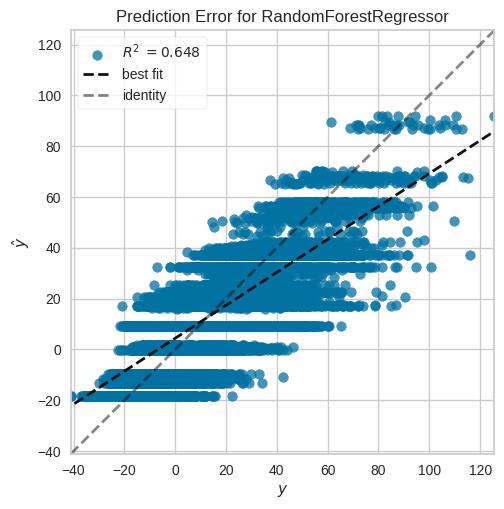

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [424]:
#Revisión visual del modelo
from yellowbrick.regressor import PredictionError
visualizador=PredictionError(modelo_1)
visualizador.fit(X_train,y_train)
visualizador.score(X_test,y_test)
visualizador.poof()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


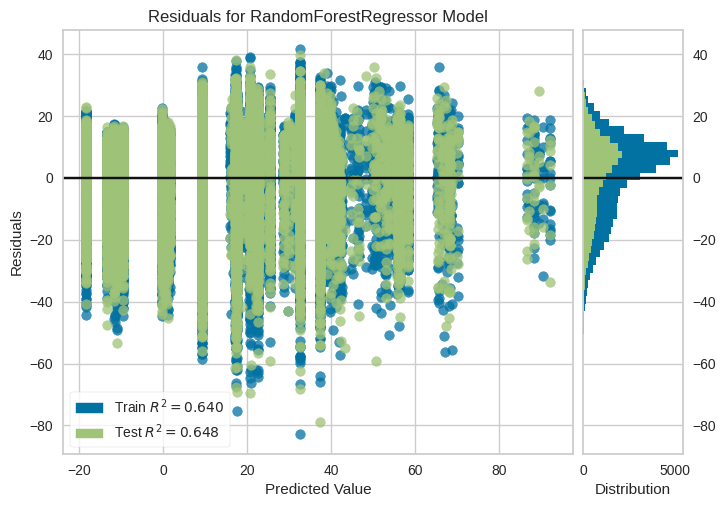

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [425]:
#Visualizar residuos
from yellowbrick.regressor import ResidualsPlot
visualizador=ResidualsPlot(modelo_1)
visualizador.fit(X_train,y_train)
visualizador.score(X_test,y_test)
visualizador.poof()

####6.2.2.Validación cruzada del modelo

In [426]:
#Kfold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

scoring={
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}
cv=KFold(n_splits=5,shuffle=True,random_state=42)
cv_result=cross_validate(modelo_1,X,y,cv=cv,scoring=scoring)
cv_result

{'fit_time': array([4.61222839, 4.84455943, 4.25508285, 5.34012151, 4.20470023]),
 'score_time': array([0.10041738, 0.07523584, 0.08151412, 0.07749653, 0.07615805]),
 'test_RMSE': array([-13.79849333, -13.83688865, -13.70475921, -14.02739434,
        -13.8788739 ]),
 'test_MAE': array([-11.05948108, -11.08233021, -11.06018802, -11.2515775 ,
        -11.14503588]),
 'test_R2': array([0.64659891, 0.6431519 , 0.64503411, 0.62942845, 0.64219271])}

##🧪7.Manejo de hiperparámetros

In [427]:
#Importancia de las variables
feature_importace=pd.DataFrame({'Features':X.columns,'Importancia':modelo_1.feature_importances_}).sort_values('Importancia',ascending=False)
feature_importace


,Features,Importancia
4,airline_BZ,0.530320
2,is_holiday,0.145896
7,aircraft_type_Airbus A320,0.100747
8,aircraft_type_Airbus A330,0.057617
12,aircraft_type_Embraer E175,0.045883
1,arrival_time,0.036042
11,aircraft_type_Boeing 787,0.026439
20,origin_TCY,0.020910
15,origin_CSF,0.015974
19,origin_PUA,0.010321


In [428]:
#Revisión de estadística de modelos por features
resultados=pd.DataFrame(index=['MAE','RMSE','R2'])
model_features=RandomForestRegressor(max_depth=5,random_state=42)
ct_features=[i if i !=0 else 1 for i in range(0,35,5)]
for i in ct_features:
  selected_features=feature_importace['Features'].values[:i]
  X_train_features=X_train[selected_features]
  X_test_features=X_test[selected_features]
  model_features.fit(X_train_features,y_train)
  y_pred_features=model_features.predict(X_test_features)
  metricas=calcular_regresion(y_test,y_pred_features)

  resultados[i]=list(metricas.values())
resultados

,1,5,10,15,20,25,30
MAE,14.9620,12.0605,11.0422,11.0285,11.0255,11.0262,11.0262
RMSE,18.8331,15.1564,13.7587,13.7497,13.7469,13.7480,13.7479
R2,0.3388,0.5718,0.6471,0.6476,0.6477,0.6477,0.6477


In [429]:
#Profundizando la revisión entre los features 10 a 15
resultados=pd.DataFrame(index=['MAE','RMSE','R2'])
model_features=RandomForestRegressor(max_depth=5,random_state=42)
ct_features=range(10,16)
for i in ct_features:
  selected_features=feature_importace['Features'].values[:i]
  X_train_features=X_train[selected_features]
  X_test_features=X_test[selected_features]
  model_features.fit(X_train_features,y_train)
  y_pred_features=model_features.predict(X_test_features)
  metricas=calcular_regresion(y_test,y_pred_features)

  resultados[i]=list(metricas.values())
resultados

,10,11,12,13,14,15
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


In [431]:
#Eligiendo 14 features
selected_features=feature_importace['Features'].values[:14]
X_selected_features=X[selected_features]

X_train,X_test,y_train,y_test=train_test_split(X_selected_features,y,test_size=0.3,random_state=42)


In [432]:
#Parámetros a modificar
param_grid={
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,4,6],
    'n_estimators':[100,150,200]
}



In [383]:
#Importar función para variar hiperparámetros
from sklearn.model_selection import GridSearchCV
cv=KFold(n_splits=5,shuffle=True,random_state=42)
model_grid=GridSearchCV(RandomForestRegressor(random_state=42),param_grid=param_grid,cv=cv,scoring=scoring,refit='R2')
model_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             refit='R2',
             scoring={'MAE': 'neg_mean_absolute_error', 'R2': 'r2',
                      'RMSE': 'neg_root_mean_squared_error'})

In [384]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 150}

In [435]:
y_predict=model_grid.predict(X_test)
resultados_grid=calcular_regresion(y_test,y_predict)


In [436]:
resultados['modelo_grid']=list(resultados_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6499
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2525
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6726


##🚀8.Importar modelo

In [437]:
import pickle

In [439]:
try:
  with open('modelo_final.pkl','wb') as file:
    pickle.dump(model_grid.best_estimator_,file)
  print('Modelo exportado')
except Exception as e:
  print(f'Error al exportar el modelo: {e}')

Modelo exportado
